# Defining the Hypothesis



The Autolib electric car-sharing service company wants to investigate a claim that the number of bluecars used during weekdays and weekends.


Null hypothesis.
HO: Bluecars are mostly taken on weekdays.


Alternate hypothesis.
Ha: Bluecars are not mostly taken on weekdays







# Reading the Data

In [1]:
#importing libraries needed for analysis.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#loading our dataset
autolib= pd.read_csv('http://bit.ly/DSCoreAutolibDataset')

# Checking the Data

In [3]:
# checking the no. of records in our dataset

autolib.shape

(16085, 13)

In [4]:
# Previewing the top of our dataset

autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [5]:
# Previewing the bottom of our dataset
autolib.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [6]:
# Checking whether each column has an appropriate datatype

autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [7]:
#Display names of all columns
autolib.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [8]:
# checking sum of null missing values in each column
autolib.isnull().sum()
# the dataset has no missing values

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

# Tidying the Dataset

In [0]:
#Dropping unnecessary columns
autolib.drop(["Utilib_taken_sum", "Utilib_returned_sum","Utilib_14_taken_sum","Utilib_14_returned_sum","date"], axis = 1, inplace = True)

In [10]:
# standardizing the columns 
autolib.columns = autolib.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
autolib.columns

Index(['postal_code', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'slots_freed_sum',
       'slots_taken_sum'],
      dtype='object')

Finding and dealing with outliers

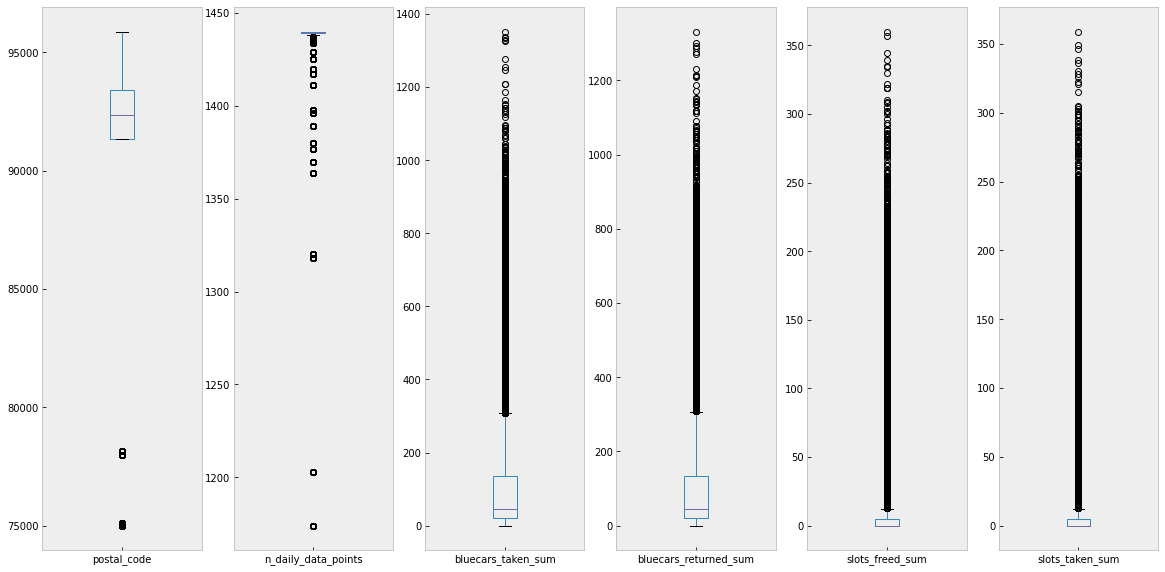

postal_code has 0 outliers in total, which is 0.0% of data
n_daily_data_points has 413 outliers in total, which is 2.6% of data
bluecars_taken_sum has 468 outliers in total, which is 2.9% of data
bluecars_returned_sum has 460 outliers in total, which is 2.9% of data
slots_freed_sum has 490 outliers in total, which is 3.0% of data
slots_taken_sum has 474 outliers in total, which is 2.9% of data


In [11]:
#FINDING THE OUTLIERS
#defining a funtion that takes the dataset name and numeric columns list as arguments 
#then returns a visual for the columns_list 
def outlier_visualiser(dataset_name, numeric_columns_list, width=20, height=10):
    
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = width
    fig_size[1] = height
    plt.rcParams["figure.figsize"] = fig_size
    plt.style.use('bmh')
    
    next_figure = 1
    for col in numeric_columns_list:
        plt.subplot(1, len(numeric_columns_list), next_figure)
        dataset_name.boxplot(col, grid=False)
        next_figure = next_figure + 1
    plt.show()
    
#we define our numeric columns list in our dataset then call the funtion for visual display
numeric_columns = ['postal_code', 'n_daily_data_points','bluecars_taken_sum', 'bluecars_returned_sum', 'slots_freed_sum','slots_taken_sum']    
outlier_visualiser(autolib, numeric_columns)

#counting number of outliers in our data columns and cheking the percentage for each
def detect_outlier(autolib_1):
    outliers=[]
    threshold=3
    mean_1 = np.mean(autolib_1)
    std_1 =np.std(autolib_1)
    
    for y in autolib_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers
#counting number of outliers in our data columns and cheking the percentage for each using z-score
for col in numeric_columns:
    rows, columns = autolib.shape
    percent_coefficient = float(100 / rows)
    outliers = detect_outlier(autolib[col])
    outliers_count = len(outliers)
    outliers_percentage = outliers_count * percent_coefficient
    print(f"{col} has {outliers_count} outliers in total, which is {outliers_percentage:.2}% of data")

In [12]:
#DEALING WITH OUTLIERS
#replacing outliers in n_daily_data_points with the 99th percentile of their data. 
q1 = autolib['n_daily_data_points'].quantile(0.99)
print(f'99th percentile of n_daily_data_points  is {q1} \n')

n_daily_data_points_outliers = detect_outlier(autolib['n_daily_data_points'])
autolib['n_daily_data_points'].replace(n_daily_data_points_outliers, q1, inplace=True)

#replacing outliers in bluecars_taken_sum with the 50th percentile of their data. 
q2 = autolib['bluecars_taken_sum'].quantile(0.50)
print(f'50th percentile of bluecars taken is {q2} \n')

bluecars_taken_outliers = detect_outlier(autolib['bluecars_taken_sum'])
autolib['bluecars_taken_sum'].replace(bluecars_taken_outliers, q2, inplace=True)

#replacing outliers in bluecars_returned_sum with the 50th percentile of their data. 
q3 = autolib['bluecars_returned_sum'].quantile(0.50)
print(f'50th percentile of bluecars returned is {q3} \n')

bluecars_returned_outliers = detect_outlier(autolib['bluecars_returned_sum'])
autolib['bluecars_returned_sum'].replace(bluecars_returned_outliers, q3, inplace=True)

#replacing outliers in slots_freed_sum with the 75th percentile of their data. 
q4 = autolib['slots_freed_sum'].quantile(0.75)
print(f'75th percentile of bluecars returned is {q4} \n')

slots_freed_sum_outliers = detect_outlier(autolib['slots_freed_sum'])
autolib['slots_freed_sum'].replace(slots_freed_sum_outliers, q4, inplace=True)

#replacing outliers in slots_taken_sum with the 75th percentile of their data. 
q5 = autolib['slots_taken_sum'].quantile(0.75)
print(f'75th percentile of bluecars returned is {q5} \n')

slots_taken_sum_outliers = detect_outlier(autolib['slots_taken_sum'])
autolib['slots_taken_sum'].replace(slots_taken_sum_outliers, q5, inplace=True)

#review outliers using z-score
print("Reviewing Outliers Using z-score test")
for col in numeric_columns:
    rows, columns = autolib.shape
    percent_coefficient = float(100 / rows)
    outliers = detect_outlier(autolib[col])
    outliers_count = len(outliers)
    outliers_percentage = outliers_count * percent_coefficient
    print(f"{col} has {outliers_count} outliers in total, which is {outliers_percentage:.2}% of data")

99th percentile of n_daily_data_points  is 1440.0 

50th percentile of bluecars taken is 46.0 

50th percentile of bluecars returned is 46.0 

75th percentile of bluecars returned is 5.0 

75th percentile of bluecars returned is 5.0 

Reviewing Outliers Using z-score test
postal_code has 0 outliers in total, which is 0.0% of data
n_daily_data_points has 707 outliers in total, which is 4.4% of data
bluecars_taken_sum has 362 outliers in total, which is 2.3% of data
bluecars_returned_sum has 371 outliers in total, which is 2.3% of data
slots_freed_sum has 573 outliers in total, which is 3.6% of data
slots_taken_sum has 578 outliers in total, which is 3.6% of data


# Exploratory Data Analysis










> Univariate Analysis



Text(0.5, 0, 'Days of the Week')

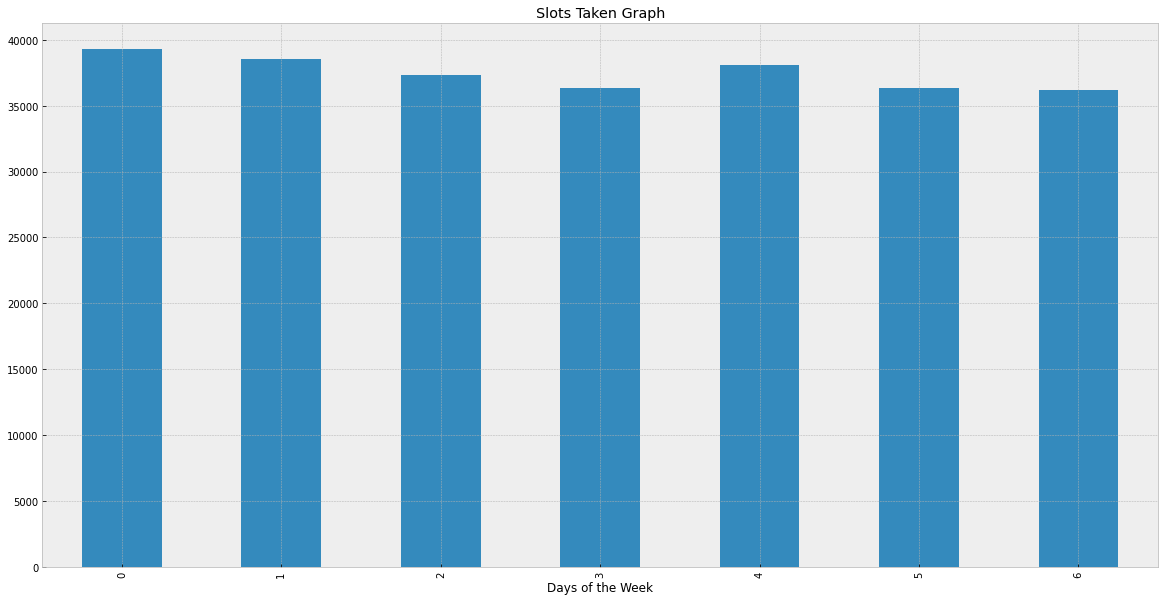

In [13]:
#plotting a bar graph for the Slots Taken variable
autolib.groupby('dayofweek')['slots_taken_sum'].sum().plot(kind='bar')
plt.title('Slots Taken Graph')
plt.xlabel('Days of the Week')

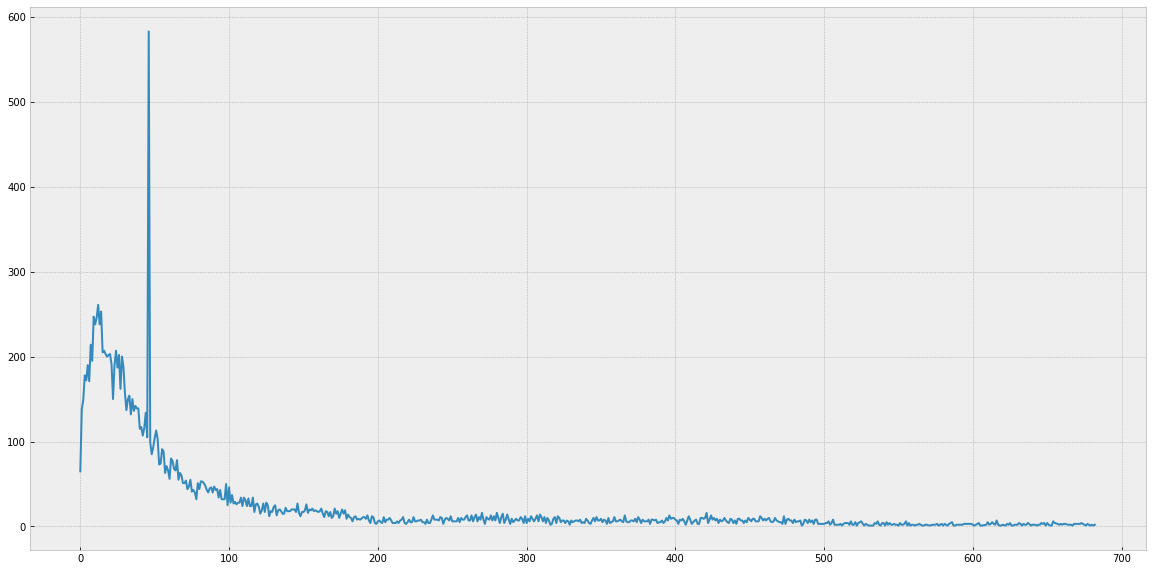

In [18]:
#line graph
autolib['bluecars_taken_sum'].value_counts().sort_index().plot.line()

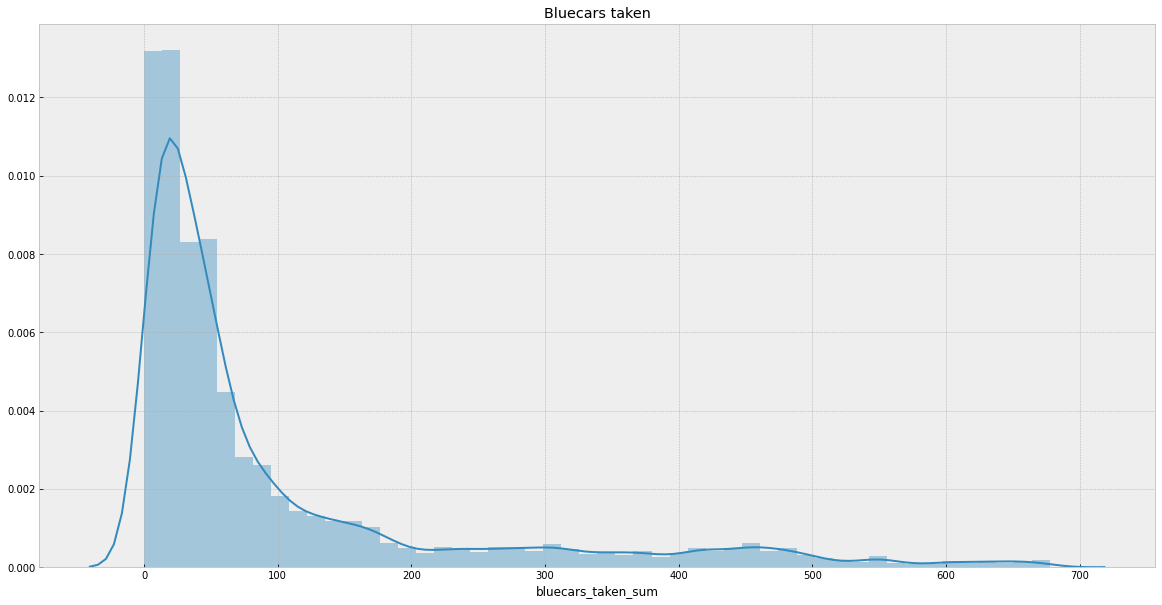

In [54]:
#HISTOGRAM
sns.distplot(autolib.bluecars_taken_sum, kde = True)
plt.title('Bluecars taken')
plt.show()



> Bivariate Analysis



<Figure size 1200x600 with 0 Axes>

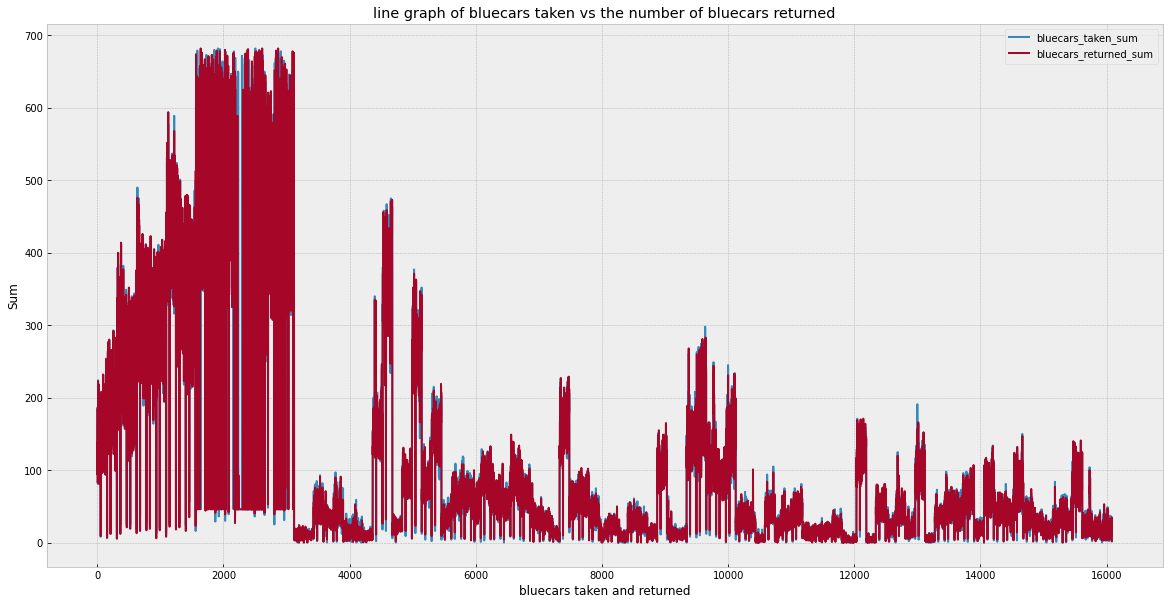

In [14]:
#line graph
plt.figure(dpi = 60)
autolib[['bluecars_taken_sum','bluecars_returned_sum']].plot()
plt.title('line graph of bluecars taken vs the number of bluecars returned')
plt.xlabel('bluecars taken and returned')
plt.ylabel('Sum')
plt.show()

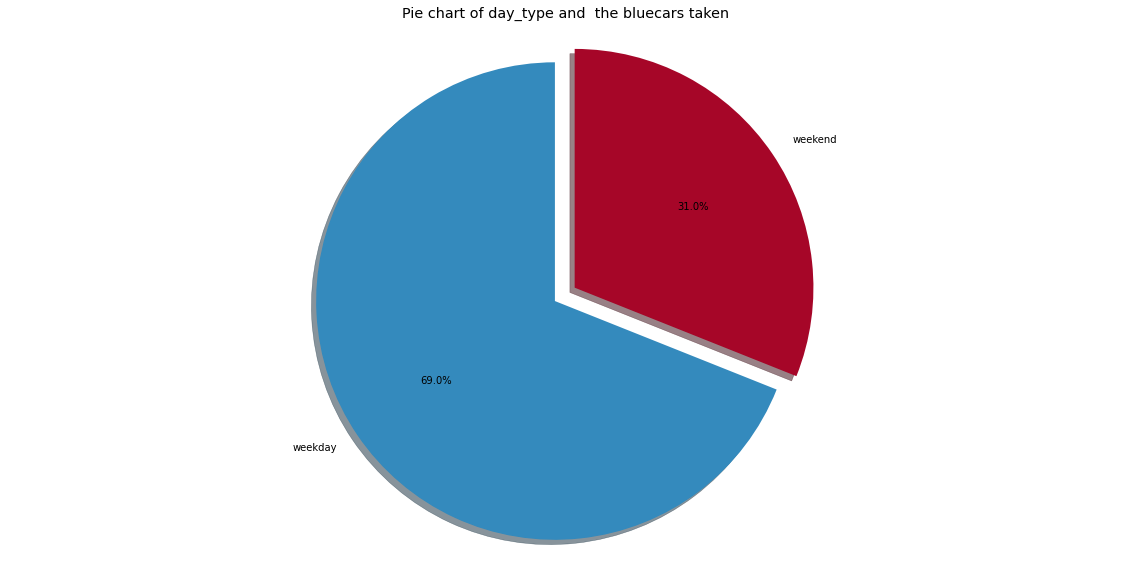

In [55]:
#PIE CHART
df=autolib.groupby('day_type').bluecars_taken_sum.sum()
explode=[0,0.1,]
label=['weekday','weekend']
plt.pie(df, explode=explode, labels=label ,autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.title('Pie chart of day_type and  the bluecars taken')
plt.show() 

Correlation

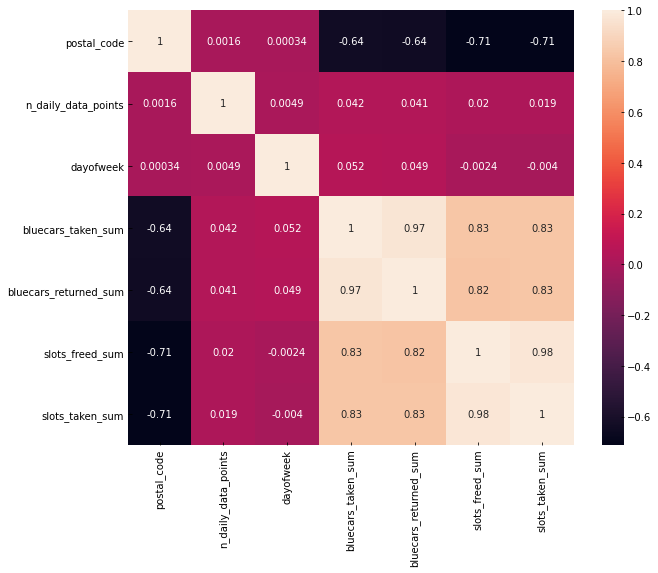

In [15]:
f, ax = plt.subplots(figsize=(10, 8))
corr = autolib.corr()
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
          annot = True)
#  variables with   correlation  more than 0.5 or -0.5 are highly correlated

Text(0.5, 0, 'day type')

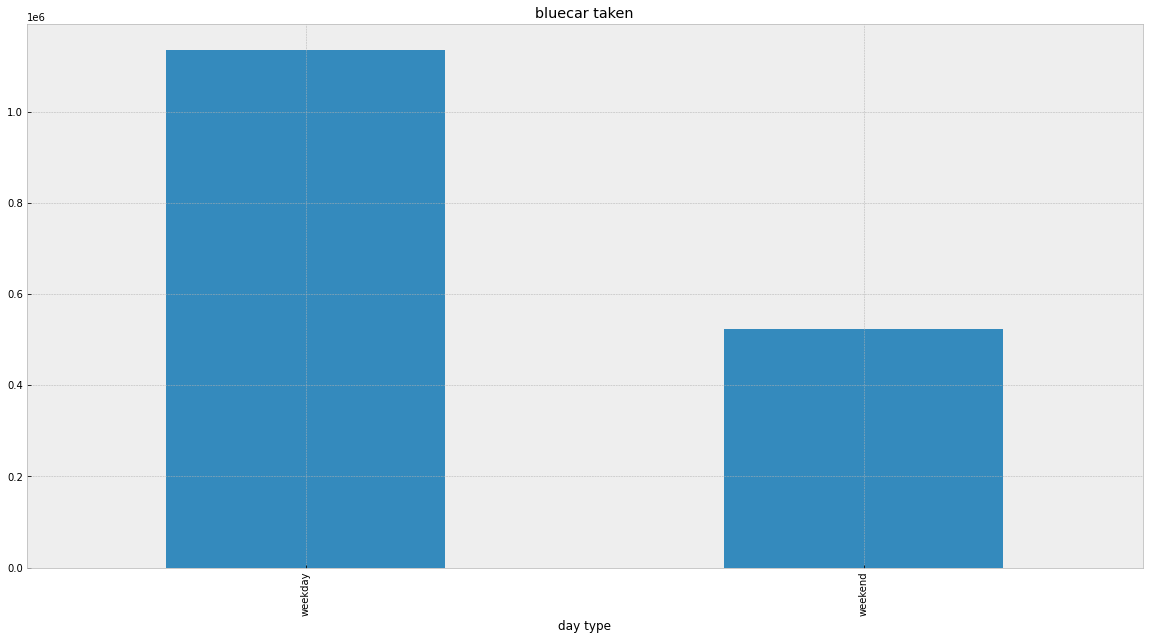

In [16]:
#finding the number of bluecars taken during the weekday and weekend
autolib.groupby('day_type')['bluecars_taken_sum'].sum().plot(kind='bar')
plt.title('bluecar taken')
plt.xlabel('day type')

Text(0.5, 0, 'day type')

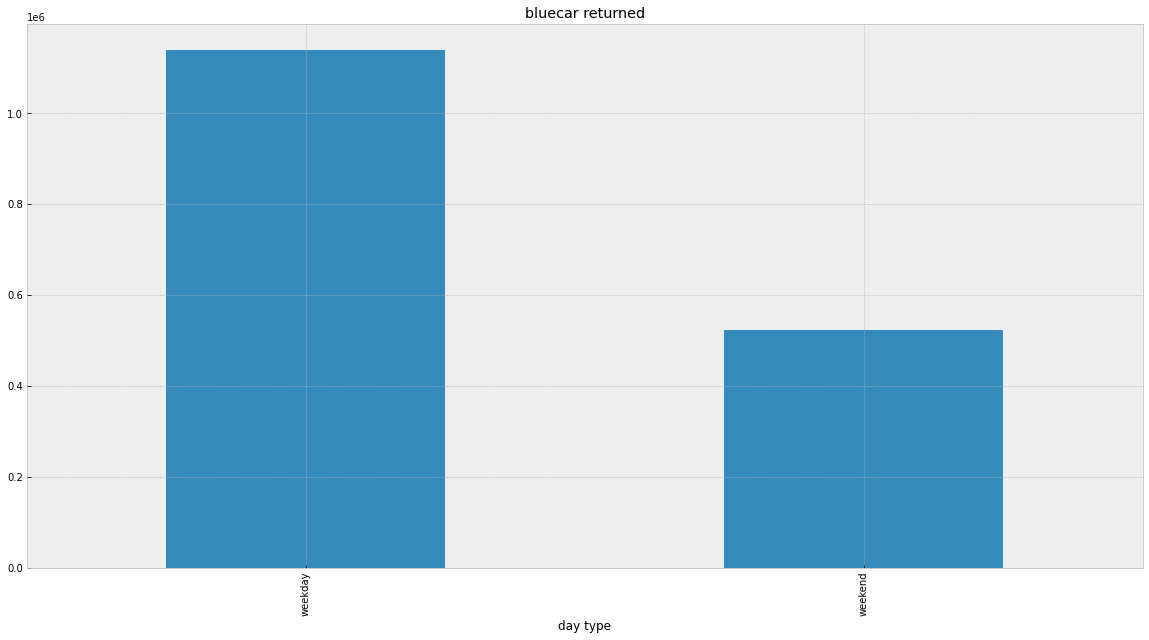

In [17]:
#finding the number of bluecars taken during the weekday and weekend
autolib.groupby('day_type')['bluecars_returned_sum'].sum().plot(kind='bar')
plt.title('bluecar returned')
plt.xlabel('day type')

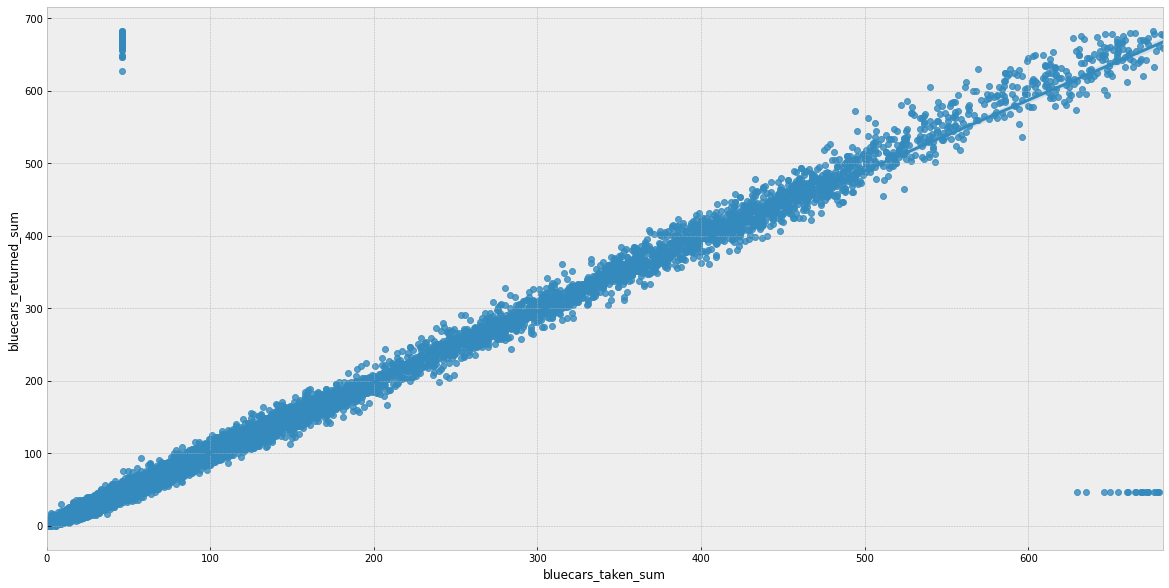

In [22]:
#NORMALITY TEST
#plotting the qq plot
sns.regplot(autolib['bluecars_taken_sum'],autolib['bluecars_returned_sum'])
plt.show()

Getting our sample

In [43]:
#stratified sampling 
autolib_strat = autolib.groupby('day_type',group_keys=False).apply(lambda x : x.sample(frac = 0.3))
autolib_strat

,postal_code,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
11135,93260,1440,2,weekday,42,45,6,6
1857,75012,1439,1,weekday,459,461,109,113
13130,94100,1438,0,weekday,6,7,0,0
11826,93370,1434,2,weekday,3,5,0,0
15766,95100,1440,2,weekday,30,27,0,0
...,...,...,...,...,...,...,...,...
9674,92700,1439,5,weekend,132,135,0,0
6494,92230,1439,6,weekend,54,54,0,0
12211,93440,1439,5,weekend,3,1,0,0
8598,92380,1438,5,weekend,48,49,0,0


# HYPOTHESIS TESTING

In [0]:
#importing the libraries
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [0]:
#creating the  y and x axis of a regression.
# x axis has bluecartaken while y axis has day type.
X = autolib_strat[['bluecars_taken_sum']].values
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
y = autolib_strat['dayofweek'].values

In [0]:
#Creating the quadratic and cubic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)

X_cubic = cubic.fit_transform(X)

In [0]:
#Fitting the linear regression model, making predictions and calculating R-squared
regr = LinearRegression()
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

In [0]:
#Fitting the quadratic model, making predictions, calculating R-squared
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

In [0]:
#Fitting the cubic model, making predictions, calculating R-squared
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

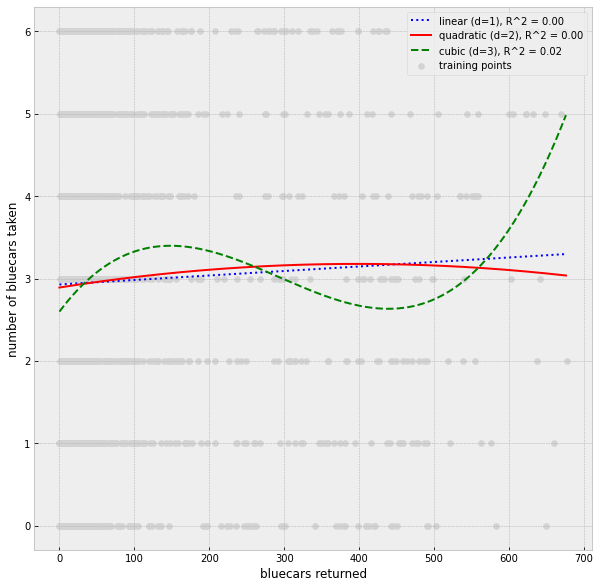

In [53]:
#Plotting the results
plt.figure(figsize=(10, 10))
plt.scatter(X, y, label='training points', color='lightgray')
plt.plot(
    X_fit, y_lin_fit,
    label=f'linear (d=1), R^2 = {linear_r2:.2f}',
    color='blue', lw=2, linestyle=':'
)
plt.plot(
    X_fit, y_quad_fit,
    label=f'quadratic (d=2), R^2 = {quadratic_r2:.2f}',
    color='red', lw=2, linestyle='-'
)
plt.plot(
    X_fit, y_cubic_fit,
    label=f'cubic (d=3), R^2 = {cubic_r2:.2f}',
    color='green', lw=2, linestyle='--'
)

plt.xlabel('bluecars returned')
plt.ylabel('number of bluecars taken')
plt.legend(loc='upper right')

y_cubic_fit
plt.show()

Now that I have my sample of 1448 variable ,I calculate the p-value from the sample. Since my sample is greater than 30 i shall use Z-TEST to calculate the P_value in order for me to either Accept or reject my null hypothesis. I shall a use a significance value of 5%

If the p-value is less than 5%, then the null hypothesis is rejected let us assume, the number of bluecars taken from postal code 75015 are 123 every weekend. Formula

Z = (x – μ) / (σ / √n)
x=mean

μ= sample mean

σ=standard deviation

√n=square root of the numberof the samples

In [47]:
# checking for the mean
print('mean of bluecars taken',autolib['bluecars_taken_sum'].mean())
print('mean of bluecars returned',autolib['bluecars_returned_sum'].mean())

mean of bluecars taken 102.26943005181347
mean of bluecars returned 102.17139896373057


In [45]:
#Checking for the mean of bluecars in our sample
mean =autolib_strat['bluecars_taken_sum'].mean()
print('The avearge number of bluecars taken from  the sample  taken are',mean)

The avearge number of bluecars taken from  the sample  taken are 112.33218232044199


In [46]:
# checking for the standard deviation of the sample
std=autolib_strat['bluecars_taken_sum'].std()
print(' The std is',std)

 The std is 151.352280912186


In [49]:
# calculating the Z value
signal=(102.26943005181347-mean)
#√1000=31.62277660
noise=(std/38.05)
z_score=(signal/noise)
print('Z score value is ',z_score)
# since our  Z score  value is  a negative value it means that  my distribution curve  is LEFT TAIL

Z score value is  -2.5297783522896817


In [0]:
from scipy import stats
from scipy.stats import norm

In [52]:
#finding our P value

p_value = 1 - stats.norm.cdf(z_score)
p_value
# after calculation of p value which is given as 1-significance level(0.05)
# I got 0.9942932698950049. This figure is greater than the significance level thus i will accept my null hypothesis.

0.9942932698950049